# **Machine Learning with Red Wine Quality data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import svm
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# **Exploring the Data**

Data_Set : https://www.kaggle.com/code/sandipan001/drink-some-data-6-wine-classification-models/data

In [ ]:
# loading the csv dataset
data = pd.read_csv('winequality-red.csv', sep=',')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.shape

(1599, 12)

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#จากข้อมูลพบว่า quality มีชนิดข้อมูลเป็น int64 ซึ่งจะต้องทำการแปลง data type เป็น category

In [ ]:
data['quality'] = data['quality'].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         1599 non-null   float64 
 1   volatile acidity      1599 non-null   float64 
 2   citric acid           1599 non-null   float64 
 3   residual sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free sulfur dioxide   1599 non-null   float64 
 6   total sulfur dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  quality               1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.3 KB


In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
with pd.option_context('display.precision', 2):
    explore = data.describe().T.style.background_gradient(cmap='Reds')
explore

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.00,8.32,1.74,4.60,7.10,7.90,9.20,15.90
volatile acidity,1599.00,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,1599.00,0.27,0.19,0.00,0.09,0.26,0.42,1.00
residual sugar,1599.00,2.54,1.41,0.90,1.90,2.20,2.60,15.50
chlorides,1599.00,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1599.00,15.87,10.46,1.00,7.00,14.00,21.00,72.00
total sulfur dioxide,1599.00,46.47,32.90,6.00,22.00,38.00,62.00,289.00
density,1599.00,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1599.00,3.31,0.15,2.74,3.21,3.31,3.40,4.01
sulphates,1599.00,0.66,0.17,0.33,0.55,0.62,0.73,2.00


In [ ]:
print("The Value Quality ",data["quality"].unique())

The Value Quality  [5, 6, 7, 4, 8, 3]
Categories (6, int64): [3, 4, 5, 6, 7, 8]


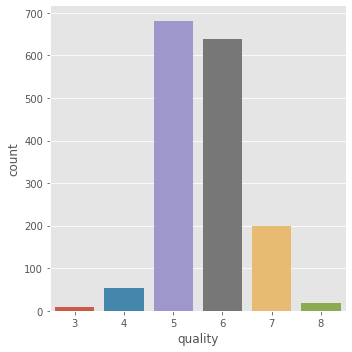

In [ ]:
# number of values for each quality
sns.catplot(x='quality', data = data, kind = 'count')

In [ ]:
avg_q = data.groupby("quality").mean()
avg_q

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


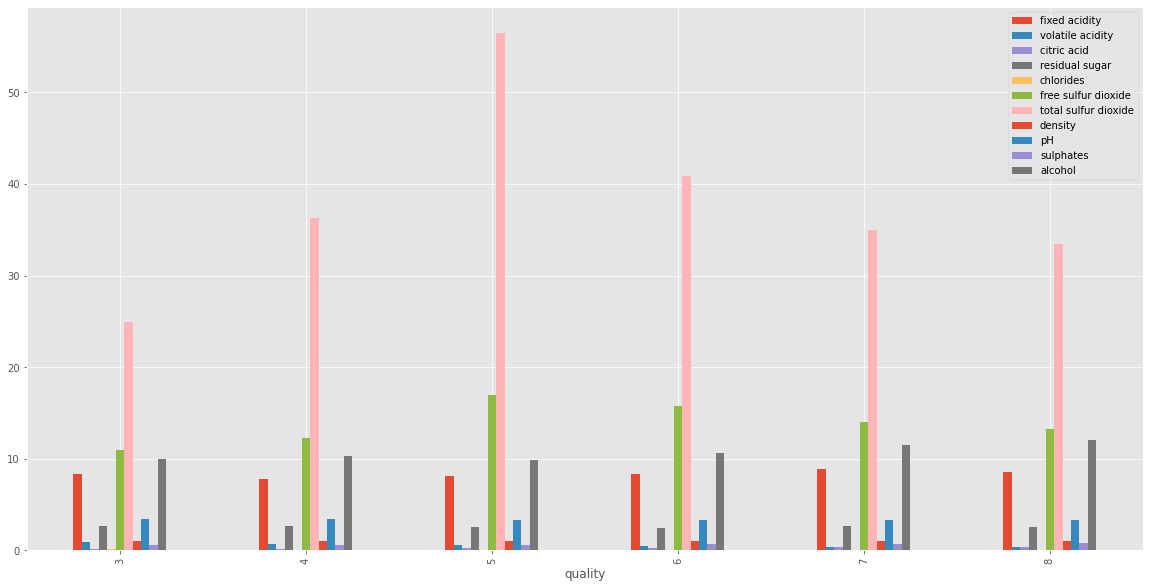

In [ ]:
avg_q.plot(kind="bar",figsize=(20,10))

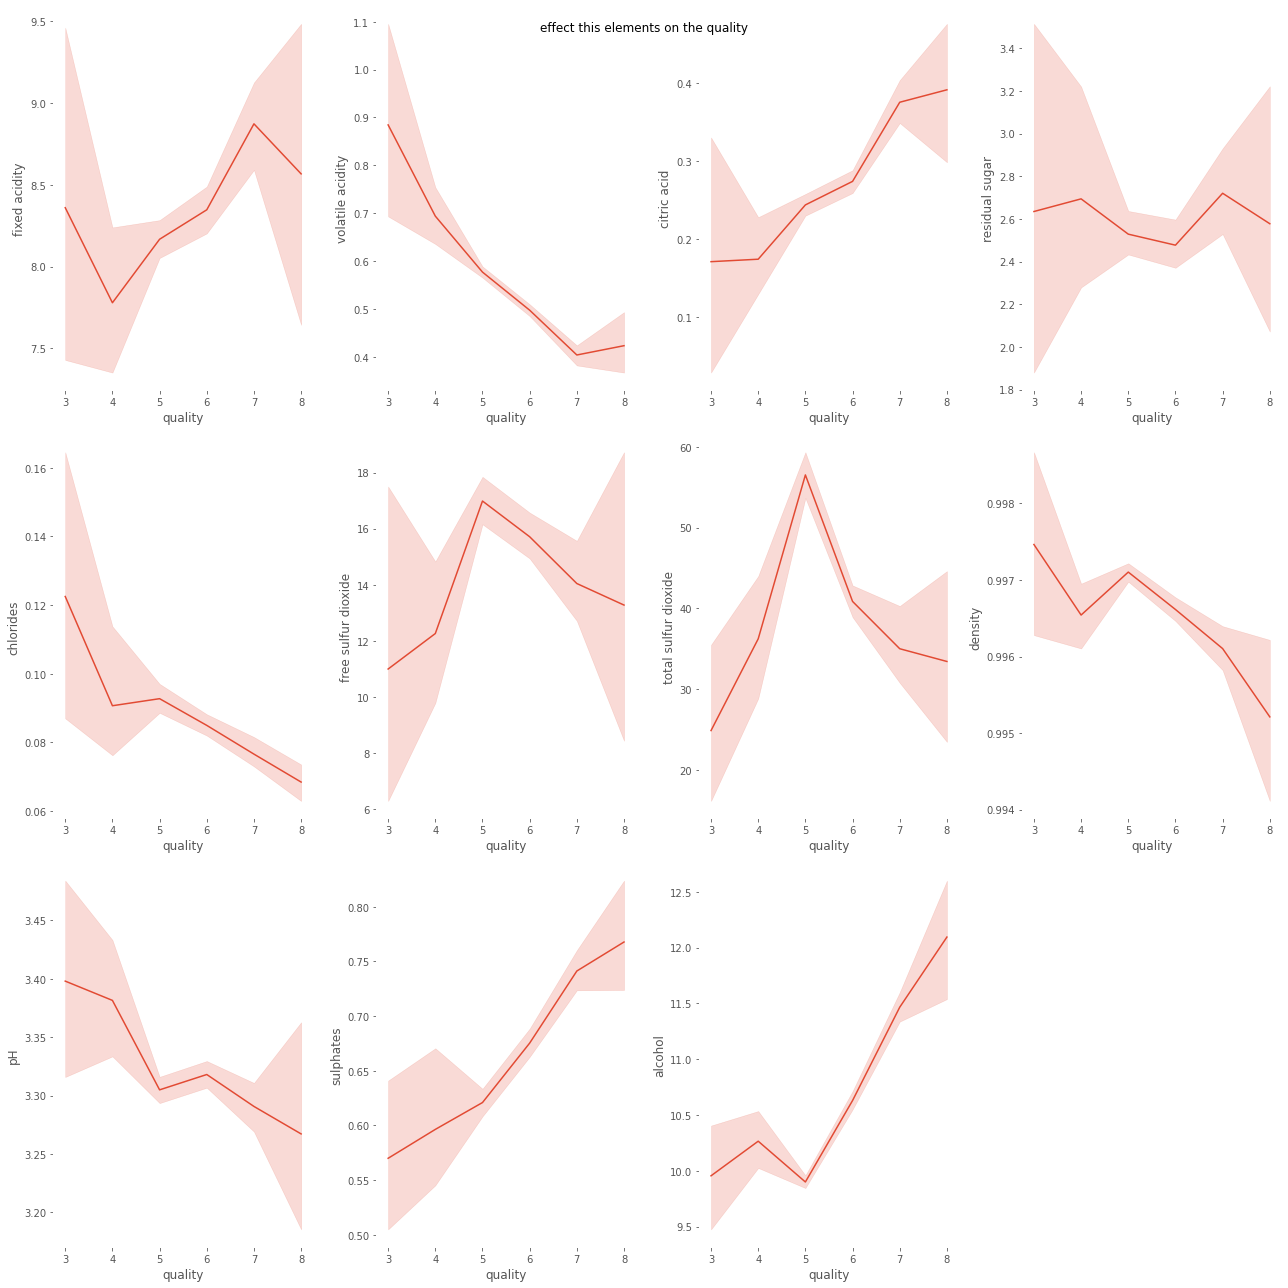

In [ ]:
plt.figure(figsize=(18, 18))
plt.suptitle('effect this elements on the quality')
for i, col in enumerate(data.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(3,4, i+1)
    sns.lineplot(data=data,x='quality', y=col)

plt.tight_layout()

## วิเคราะห์ผลลัพธ์
จากกราฟแสดงความสันพันธ์ระหว่าง Quality กับ Feature ต่างๆได้ดังนี้

1.ค่า volatile acidity,chlorides,density และ pH น้อยจะส่งผลให้คุณภาพของไวน์แดงสูงขึ้น

2.ค่า citric acid,alcohol และ sulphates มากจะส่งผลให้คุณภาพของไวน์แดงสูงขึ้น

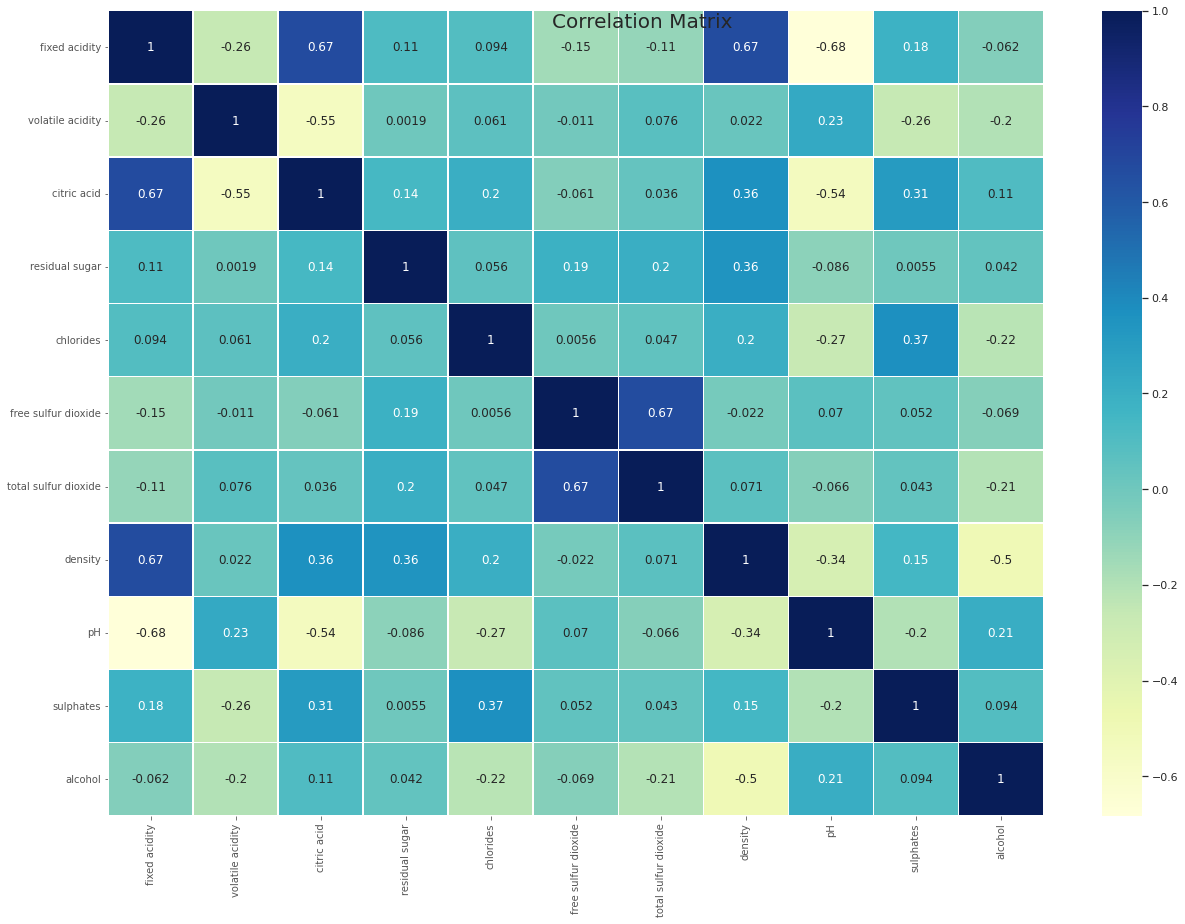

In [ ]:
plt.subplots(figsize = (18,13))
sns.set(font_scale = 1)

hmap = sns.heatmap(data = data.corr(),
            annot = True,
            linewidths = .5,
            cmap = "YlGnBu"
            )

plt.suptitle("Correlation Matrix", fontsize = 20)
plt.tight_layout()

# จากกราฟแสดงความสัมพันธ์(Correlation) ระหว่าง Feature ต่างๆ แสดงให้เห็นว่าค่าที่มีความสัมพันธ์กันมากที่สุด ได้แก่
## 1. ความสัมพันธ์ระหว่าง fixed acidity กับ density มีค่าเท่ากับ 0.67 เนื่องจาก ถ้าค่าความเป็นกรดคงที่(กรดที่ไม่ระเหยในไวน์) แปรผันตรงตามค่าความหนาแน่น
## 2. ความสัมพันธ์ระหว่าง fixed acidity กับ citric acid มีค่าเท่ากับ 0.67 เนื่องจาก กรด citric acid เป็นกรดชนิดคงที่(fixed acidity) จึงทำให้ 2 ค่านี้แปรผันตามกัน
## 3. ความสัมพันธ์ระหว่าง total sulfur dioxide กับ free sulfur dioxide มีค่าเท่ากับ 0.67 เนื่องจาก total sulfur dioxide ประกอบไปด้วย free sulfur dioxide จึงทำให้ 2 ค่านี้แปรผันตามกัน

## plot กราฟเพื่อแสดงความเบ้ของข้อมูลหากข้อมูลมีความเบ้สูงแสดงว่าข้อมูลนั้นมีการกระจายตัวที่ไม่ปกติ


In [ ]:
from plotly.express import bar

skewness = data.skew().sort_values(ascending=True)
fig = bar(x=skewness, y=skewness.index, color=skewness.index, labels={'x': 'Skewness', 'y':'Descriptors'})
fig.update_layout(showlegend=False)
fig.add_vline(x=1, line_dash="dash", line_color="red")
fig.show()

<ipython-input-17-991019bd6442>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = data.skew().sort_values(ascending=True)




```
# This is formatted as code
```

### **แบ่งข้อมูล Training set และ Test set แล้วนำข้อมูลมาเข้า model ก่อนจะไปทำ scaling**

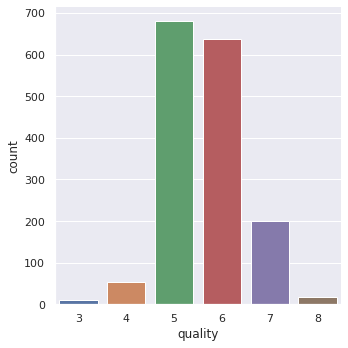

In [ ]:
sns.catplot(x='quality', data = data, kind = 'count')

In [ ]:
#จากกราฟ จะเห็นได้ว่า label มี 6 label ซึ่งสามารถแบ่งออกเป็น 3 ระดับได้ชัดเจน คือ Quality ระดับคุณภาพแย่ ระดับคุณภาพปานกลาง และระดับคุณภาพดี
#โดยกำหนดให้ quality ระดับ 3-4 อยู่ในระดับคุณภาพแย่ โดยให้ตัวแปร y(quality) = 1
            quality ระดับ 5-6 อยู่ในระดับคุณภาพปานกลาง โดยให้ตัวแปร y(quality) = 2
            quality ระดับ 7-8 อยู่ในระดับคุณภาพดี โดยให้ตัวแปร y(quality) = 3

In [ ]:
#จะทำการเปลี่ยน target โดยแบ่งออกเป็น 3 ระดับได้แก่ ระดับคุณภาพแย่(Poor) ระดับคุณภาพปานกลาง(Fair) และระดับคุณภาพดี(Good) โดยกำหนดให้ Poor = 1 , Fair = 2 และ Good = 3#

In [ ]:
quality_series = data.loc[:, "quality"]
quality_categorical_series = pd.cut(quality_series, [2, 4, 6, 8], labels=["1", "2","3"])
data["quality"] = quality_categorical_series
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [ ]:
#Defined X value and y value , and split the data train

X = data.drop(columns="quality")
y = data["quality"]    # y = quality

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=1)
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (1199, 11)
X Test  :  (400, 11)
Y Train :  (1199,)
Y Test  :  (400,)


In [ ]:
y_test

525     2
1570    2
1070    3
883     2
983     2
       ..
1162    3
164     2
564     2
615     2
1421    2
Name: quality, Length: 400, dtype: category
Categories (3, object): ['1' < '2' < '3']

In [ ]:
# using the model KNN
K_model = KNeighborsClassifier(n_neighbors = 7)
K_model.fit(X_train, y_train,)

y_pred_k = K_model.predict(X_test)

print("Score the X-train with Y-train is : ", K_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", K_model.score(X_test,y_test))
print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))
target_names = ['Poor', 'Fair', 'Good']
print(classification_report(y_pred_k,y_test,target_names=target_names))

KNN_Raw = K_model.score(X_test,y_test)

Score the X-train with Y-train is :  0.8448707256046706
Score the X-test  with Y-test  is :  0.805
 Model Evaluation K Neighbors Classifier : accuracy score  0.805
              precision    recall  f1-score   support

        Poor       0.00      0.00      0.00         2
        Fair       0.95      0.84      0.89       371
        Good       0.19      0.37      0.25        27

    accuracy                           0.81       400
   macro avg       0.38      0.40      0.38       400
weighted avg       0.89      0.81      0.84       400



In [ ]:
# using the model Logistic Regression

LogReg_model=LogisticRegression(solver='liblinear')

# fit model

LogReg_model.fit(X_train,y_train)


# Score X and Y - test and train model Logistic Regression

print("Score the X-train with Y-train is : ", LogReg_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LogReg_model.score(X_test,y_test))

# Expected value Y using X test

y_pred_LogReg=LogReg_model.predict(X_test)

# Model Evaluation

print(" Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_LogReg))
target_names = ['Poor', 'Fair', 'Good']
print(classification_report(y_pred_LogReg,y_test,target_names=target_names))

Logis_Raw = LogReg_model.score(X_test,y_test)

Score the X-train with Y-train is :  0.8348623853211009
Score the X-test  with Y-test  is :  0.845
 Model Evaluation Logistic R : accuracy score  0.845
              precision    recall  f1-score   support

        Poor       0.00      0.00      0.00         0
        Fair       0.97      0.86      0.91       374
        Good       0.31      0.65      0.43        26

    accuracy                           0.84       400
   macro avg       0.43      0.50      0.45       400
weighted avg       0.93      0.84      0.88       400



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#เอาเข้า model SVM

SVM_model = svm.SVC(decision_function_shape='ovo')
SVM_model.fit(X_train, y_train)

y_pred_SVM = SVM_model.predict(X_test)

print("Score the X-train with Y-train is : ", SVM_model.score(X_train, y_train))
print("Score the X-test  with Y-test  is : ", SVM_model.score(X_test,y_test))
print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))
target_names = ['Poor', 'Fair', 'Good']
print(classification_report(y_pred_SVM,y_test,target_names=target_names))

SVM_Raw = SVM_model.score(X_test,y_test)

Score the X-train with Y-train is :  0.8256880733944955
Score the X-test  with Y-test  is :  0.8275
 Model Evaluation K Neighbors Classifier : accuracy score  0.805
              precision    recall  f1-score   support

        Poor       0.00      0.00      0.00         0
        Fair       1.00      0.83      0.91       399
        Good       0.02      1.00      0.04         1

    accuracy                           0.83       400
   macro avg       0.34      0.61      0.31       400
weighted avg       1.00      0.83      0.90       400



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



### **ทำ Feature Scaling และ Training model**

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.380531,0.246575,0.303797,0.133562,0.136895,0.478873,0.367647,0.596916,0.208696,0.121212,0.123077
1,0.292035,0.054795,0.443038,0.054795,0.070117,0.084507,0.033088,0.331131,0.400000,0.284848,0.538462
2,0.477876,0.253425,0.253165,0.691781,0.098497,0.169014,0.161765,0.839207,0.260870,0.218182,0.123077
3,0.699115,0.232877,0.797468,0.075342,0.098497,0.070423,0.033088,0.640969,0.113043,0.327273,0.276923
4,0.592920,0.164384,0.835443,0.102740,0.185309,0.028169,0.007353,0.466226,0.295652,0.121212,0.538462
...,...,...,...,...,...,...,...,...,...,...,...
1194,0.318584,0.184932,0.481013,0.041096,0.076795,0.126761,0.084559,0.450073,0.347826,0.248485,0.215385
1195,0.380531,0.191781,0.405063,0.321918,0.125209,0.126761,0.150735,0.662996,0.452174,0.266667,0.323077
1196,0.185841,0.027397,0.810127,0.082192,0.078464,0.323944,0.169118,0.357562,0.417391,0.230303,0.430769
1197,0.530973,0.260274,0.569620,0.116438,0.178631,0.464789,0.227941,0.514684,0.321739,0.236364,0.384615


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_test_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.509434,0.514851,0.24,0.214286,0.123264,0.54,0.166078,0.728745,0.431034,0.173913,0.18
1,0.132075,0.237624,0.53,0.128571,0.340278,0.34,0.102473,0.210526,0.543103,0.335404,0.68
2,0.405660,0.207921,0.45,0.028571,0.039931,0.34,0.109541,0.338462,0.379310,0.310559,0.42
3,0.207547,0.475248,0.04,0.171429,0.072917,0.32,0.289753,0.538462,0.681034,0.099379,0.10
4,0.386792,0.376238,0.30,0.085714,0.053819,0.12,0.038869,0.561943,0.500000,0.198758,0.30
...,...,...,...,...,...,...,...,...,...,...,...
395,0.330189,0.198020,0.42,0.142857,0.071181,0.20,0.045936,0.286640,0.344828,0.198758,0.56
396,0.216981,0.465347,0.26,0.842857,0.062500,0.66,0.406360,0.591093,0.543103,0.062112,0.08
397,0.754717,0.346535,0.49,0.428571,0.088542,0.08,0.144876,0.914980,0.482759,0.180124,0.74
398,0.433962,0.475248,0.50,0.142857,0.078125,0.52,0.229682,0.720648,0.655172,0.111801,0.14


In [ ]:
# using the model KNN
K_model = KNeighborsClassifier(n_neighbors = 7)
K_model.fit(X_train_scaled, y_train)

y_pred_scale = K_model.predict(X_test_scaled)

print("Score the X-train with Y-train is : ", K_model.score(X_train_scaled,y_train))
print("Score the X-test  with Y-test  is : ", K_model.score(X_test_scaled,y_test))
#print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))
target_names = ['Poor', 'fair', 'good']
print(classification_report(y_pred_scale,y_test,target_names=target_names))

Scale_KNN = K_model.score(X_test_scaled,y_test)

Score the X-train with Y-train is :  0.8565471226021685
Score the X-test  with Y-test  is :  0.83
              precision    recall  f1-score   support

        Poor       0.25      0.31      0.28        13
        fair       0.95      0.86      0.90       364
        good       0.28      0.65      0.39        23

    accuracy                           0.83       400
   macro avg       0.49      0.61      0.52       400
weighted avg       0.89      0.83      0.85       400



In [ ]:
# using the model Logistic Regression

LogReg_model=LogisticRegression(solver='liblinear')

# fit model

LogReg_model.fit(X_train_scaled,y_train)


# Score X and Y - test and train model Logistic Regression

print("Score the X-train with Y-train is : ", LogReg_model.score(X_train_scaled,y_train))
print("Score the X-test  with Y-test  is : ", LogReg_model.score(X_test_scaled,y_test))

# Expected value Y using X test

y_pred_LogReg_Scale=LogReg_model.predict(X_test_scaled)

# Model Evaluation

print(" Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_LogReg_Scale))
target_names = ['Poor', 'Fair', 'Good']
print(classification_report(y_pred_LogReg_Scale,y_test,target_names=target_names))

Scale_Logis = LogReg_model.score(X_test_scaled,y_test)

Score the X-train with Y-train is :  0.8331943286071727
Score the X-test  with Y-test  is :  0.84
 Model Evaluation Logistic R : accuracy score  0.84
              precision    recall  f1-score   support

        Poor       0.00      0.00      0.00         0
        Fair       0.98      0.85      0.91       382
        Good       0.22      0.67      0.33        18

    accuracy                           0.84       400
   macro avg       0.40      0.50      0.41       400
weighted avg       0.95      0.84      0.88       400



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#เอาเข้า model SVM

SVM_model = svm.SVC(decision_function_shape='ovo')
SVM_model.fit(X_train_scaled, y_train)

y_pred_SVM_scale = SVM_model.predict(X_test_scaled)

print("Score the X-train with Y-train is : ", SVM_model.score(X_train_scaled, y_train))
print("Score the X-test  with Y-test  is : ", SVM_model.score(X_test_scaled,y_test))
print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_SVM_scale))
target_names = ['Poor', 'Fair', 'Good']
print(classification_report(y_pred_SVM_scale,y_test,target_names=target_names))

Scale_SVM = SVM_model.score(X_test_scaled,y_test)

Score the X-train with Y-train is :  0.8582151793160967
Score the X-test  with Y-test  is :  0.835
 Model Evaluation K Neighbors Classifier : accuracy score  0.835
              precision    recall  f1-score   support

        Poor       0.00      0.00      0.00         0
        Fair       0.99      0.84      0.91       388
        Good       0.15      0.67      0.24        12

    accuracy                           0.83       400
   macro avg       0.38      0.50      0.38       400
weighted avg       0.96      0.83      0.89       400



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



### **ทำ Oversampling เพื่อให้ข้อมูลมีความ balanced**

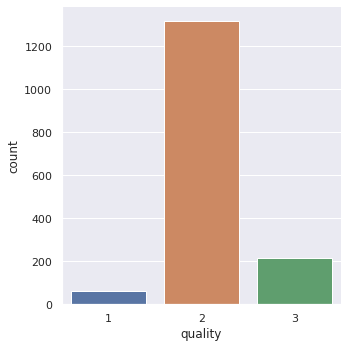

In [ ]:
sns.catplot(x='quality', data = data, kind = 'count')

จากกราฟจะเห็นว่าข้อมูลมีความไม่สมดุล (Imbalanced) จึงต้องทำการ Fixing Unbalanced Classes โดยใช้เทคนิคในการจัดการกับข้อมูลที่ไม่สมดุล โดยการทำ Over-sampling สุ่มเพิ่มจำนวนข้อมูลกลุ่มน้อย (Minor class) ให้มีจำนวนพอๆกับข้อมูลกลุ่มหลัก (Major class) ก่อนจะทำ machine learning model

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_samp, y_train_samp =  oversample.fit_resample(X_train_scaled,y_train)

In [ ]:
# using the model KNN
K_model = KNeighborsClassifier(n_neighbors = 7)
K_model.fit(X_train_samp, y_train_samp)

y_pred_samp = K_model.predict(X_test_scaled)

print("Score the X-train with Y-train is : ", K_model.score(X_train_samp,y_train_samp))
print("Score the X-test  with Y-test  is : ", K_model.score(X_test_scaled,y_test))
#print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))
target_names = ['Poor', 'fair', 'good']
print(classification_report(y_pred_samp,y_test,target_names=target_names))

OverS_KNN = K_model.score(X_test_scaled,y_test)

Score the X-train with Y-train is :  0.8928210313447927
Score the X-test  with Y-test  is :  0.555
              precision    recall  f1-score   support

        Poor       0.50      0.07      0.12       114
        fair       0.55      0.89      0.68       204
        good       0.59      0.39      0.47        82

    accuracy                           0.56       400
   macro avg       0.55      0.45      0.43       400
weighted avg       0.55      0.56      0.48       400



In [ ]:
# using the model Logistic Regression

LogReg_model=LogisticRegression(solver='liblinear')

# fit model

LogReg_model.fit(X_train_samp,y_train_samp)


# Score X and Y - test and train model Logistic Regression

print("Score the X-train with Y-train is : ", LogReg_model.score(X_train_samp,y_train_samp))
print("Score the X-test  with Y-test  is : ", LogReg_model.score(X_test_scaled,y_test))

# Expected value Y using X test

y_pred_LogReg_Samp=LogReg_model.predict(X_test_scaled)

# Model Evaluation
print(" Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_LogReg_Samp))
target_names = ['Poor', 'Fair', 'Good']
print(classification_report(y_pred_LogReg_Samp,y_test,target_names=target_names))

OverS_Logis = LogReg_model.score(X_test_scaled,y_test)

Score the X-train with Y-train is :  0.7408156386922817
Score the X-test  with Y-test  is :  0.3325
 Model Evaluation Logistic R : accuracy score  0.3325
              precision    recall  f1-score   support

        Poor       0.81      0.06      0.11       219
        Fair       0.25      0.89      0.39        93
        Good       0.69      0.42      0.52        88

    accuracy                           0.33       400
   macro avg       0.58      0.46      0.34       400
weighted avg       0.65      0.33      0.27       400



In [ ]:
# using the model SVM

SVM_model = svm.SVC(decision_function_shape='ovo')
SVM_model.fit(X_train_samp, y_train_samp)

y_pred_SVM_samp = SVM_model.predict(X_test_scaled)

print("Score the X-train with Y-train is : ", SVM_model.score(X_train_samp, y_train_samp))
print("Score the X-test  with Y-test  is : ", SVM_model.score(X_test_scaled,y_test))
print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_SVM_samp))
target_names = ['Poor', 'Fair', 'Good']
print(classification_report(y_pred_SVM_samp,y_test,target_names=target_names))

OverS_SVM = SVM_model.score(X_test_scaled,y_test)

Score the X-train with Y-train is :  0.8399056285810583
Score the X-test  with Y-test  is :  0.4675
 Model Evaluation K Neighbors Classifier : accuracy score  0.4675
              precision    recall  f1-score   support

        Poor       0.62      0.06      0.11       168
        Fair       0.43      0.90      0.58       159
        Good       0.63      0.47      0.54        73

    accuracy                           0.47       400
   macro avg       0.56      0.47      0.41       400
weighted avg       0.55      0.47      0.38       400



In [ ]:
models = pd.DataFrame({
    'Model' : ['KNeighborsClassifier ','Logistics Regression','SVM '],
    'Raw Data Score' : [KNN_Raw, Logis_Raw, SVM_Raw],
    'Scaling Data Score' : [Scale_KNN, Scale_Logis, Scale_SVM],
    'OverSampling Data Score' : [OverS_KNN, OverS_Logis, OverS_SVM]

})


models.sort_values(by = 'Raw Data Score', ascending = False)

,Model,Raw Data Score,Scaling Data Score,OverSampling Data Score
1,Logistics Regression,0.8450,0.840,0.3325
2,SVM,0.8275,0.835,0.4675
0,KNeighborsClassifier,0.8050,0.830,0.5550
